# Task:
This week’s assignment involves running a k-means cluster analysis. Cluster analysis is an unsupervised machine learning method that partitions the observations in a data set into a smaller set of clusters where each observation belongs to only one cluster. The goal of cluster analysis is to group, or cluster, observations into subsets based on their similarity of responses on multiple variables. Clustering variables should be primarily quantitative variables, but binary variables may also be included.

Your assignment is to run a k-means cluster analysis to identify subgroups of observations in your data set that have similar patterns of response on a set of clustering variables

# Data:
Dataset can be found here: https://github.com/Konahrik/coursera-machine-learning-data-analysis/tree/master/data

The grouping was conducted on the basis of similarities in some characteristics that could affect school performance. There ale list of them:

ALCEVR1 – ever took alcohol

MAREVER1 – ever took marijuana

ALCPROBS1 – alcohol problems

DEVIANT1 – deviant behaviour scale

VIOL1 – violent behaviour scale

DEP1 – depression scale

ESTEEM1 – self esteem scale

PARPERES – parental presence scale

PARACTV – parent activities scale

FAMCONCT – family connectedness scale

SCHCONN1 – family connectedness scale

All clustering variables were standardized to have a mean of 0 and a standard deviation of 1 in order to balance all scales.

# Results:
Data was randomly split into train and test splits (70/30) to train and test k-means model. In order to test influence of cluster number and select the best number of clusters, there were conducted series of analysis, fitting model with k=1-9 clusters. The variance in the clustering variables that was accounted for by the clusters (r-square) was plotted for each of the nine cluster solutions in an elbow curve to provide guidance for choosing the number of clusters to interpret. Results can be observed below (Figure 1).

Results for k = 3 were selected for further analysis. 

To reduce number of variables PCA analysis were performed. A scatterplot of the first two canonical variables by cluster (Figure 2 shown below) can be seen below.

Cluster with green dots has low cluster variance,  cluster with purple dots is also packed well enough, but some variance exists. And finally cluster with yellow dots is well separated from other ones, but it is much more spread on the plot, showing high variance in the plot. Nevertheless, data is well separated (clusters overlap is not significant)=> k=3 is a suitable number for current situation. Although, other variants are possible.

Cluster 0, had the highest likelihood of having used alcohol, but otherwise tended to fall somewhere in between the other two clusters on the other variables. Cluster 1, includes adolescents with highest likelihood of having used alcohol, a very high likelihood of having used marijuana, more alcohol problems, and more engagement in deviant and violent behaviors compared to the other two clusters. It also has higher levels of depression, lower self-esteem, and the lowest levels of school connectedness, parental presence, involvement of parent in activities, and family connectedness. Cluster 2 includes adolescents that were least likely to have used alcohol and marijuana, and had the lowest number of alcohol problems and deviant and violent behaviour.

In order to validate the clusters,  ANOVA analysis was conducted to test for significant differences between the clusters on grade point average (GPA). Results indicated significant differences between the clusters on GPA (F(2, 3199)=136, p<.0001). The tukey test showed that clusters differ significantly within GPA, although difference between cluster 1 and 2 is not significant.

In [1]:
##Importing required libraries
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
%matplotlib inline
RND_STATE = 55121

In [2]:
#Reading data
data = pd.read_csv("data/tree_addhealth.csv")
data.columns = map(str.upper, data.columns)

In [3]:
#Cleaning data
data_clean = data.dropna()

In [ ]:
#Selecting clustering variables
cluster=data_clean[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1',
'DEP1','ESTEEM1','SCHCONN1','PARACTV', 'PARPRES','FAMCONCT']]

In [5]:
cluster.describe()

,ALCEVR1,MAREVER1,ALCPROBS1,DEVIANT1,VIOL1,DEP1,ESTEEM1,SCHCONN1,PARACTV,PARPRES,FAMCONCT
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,0.527432,0.241967,0.369180,2.645027,1.618579,8.537049,40.952131,28.360656,6.290710,13.398033,22.570557
std,0.499302,0.428321,0.894947,3.520554,2.593230,6.571052,5.381439,5.156385,3.360219,2.085837,2.614754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,6.000000,0.000000,3.000000,6.300000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,38.000000,25.000000,4.000000,12.000000,21.700000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,7.000000,40.000000,29.000000,6.000000,14.000000,23.700000
75%,1.000000,0.000000,0.000000,4.000000,2.000000,12.000000,45.000000,32.000000,9.000000,15.000000,24.300000
max,1.000000,1.000000,6.000000,27.000000,19.000000,48.000000,50.000000,38.000000,18.000000,15.000000,25.000000


In [6]:
#Scaling data
clustervar=cluster.copy()
clustervar['ALCEVR1']=preprocessing.scale(clustervar['ALCEVR1'].astype('float64'))
clustervar['ALCPROBS1']=preprocessing.scale(clustervar['ALCPROBS1'].astype('float64'))
clustervar['MAREVER1']=preprocessing.scale(clustervar['MAREVER1'].astype('float64'))
clustervar['DEP1']=preprocessing.scale(clustervar['DEP1'].astype('float64'))
clustervar['ESTEEM1']=preprocessing.scale(clustervar['ESTEEM1'].astype('float64'))
clustervar['VIOL1']=preprocessing.scale(clustervar['VIOL1'].astype('float64'))
clustervar['DEVIANT1']=preprocessing.scale(clustervar['DEVIANT1'].astype('float64'))
clustervar['FAMCONCT']=preprocessing.scale(clustervar['FAMCONCT'].astype('float64'))
clustervar['SCHCONN1']=preprocessing.scale(clustervar['SCHCONN1'].astype('float64'))
clustervar['PARACTV']=preprocessing.scale(clustervar['PARACTV'].astype('float64'))
clustervar['PARPRES']=preprocessing.scale(clustervar['PARPRES'].astype('float64'))

In [7]:
#Dividing data into test and train sets
clus_train, clus_test = train_test_split(clustervar, test_size=0.3, random_state=RND_STATE)

In [8]:
#Making k-means analysis for 1-9 clusters
clusters=range(1,10)
meandist=[]

In [9]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

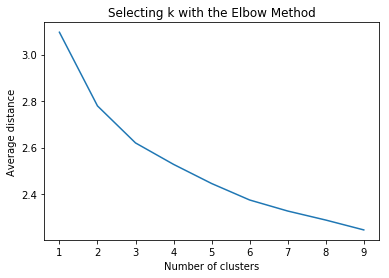

In [10]:
#Plotting relation between number of clusters and average distance (Figure 1)
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [11]:
#Checking solution for 3-clusters model
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

In [13]:
#Merging cluster assignment with clustering variables to examine cluster variable means by cluster
clus_train.reset_index(level=0, inplace=True)
cluslist=list(clus_train['index'])
labels=list(model3.labels_)
newlist=dict(zip(cluslist, labels))

In [14]:
newclus=DataFrame.from_dict(newlist, orient='index')
newclus.columns = ['cluster']
newclus.describe()

,cluster
count,3202.000000
mean,1.232042
std,0.768115
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [15]:
newclus.reset_index(level=0, inplace=True)
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
merged_train.cluster.value_counts()

2    1402
1    1141
0     659
Name: cluster, dtype: int64

In [16]:
#Calculating clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
               index   ALCEVR1  MAREVER1  ALCPROBS1  DEVIANT1     VIOL1  \
cluster                                                                   
0        3265.694992  0.685167  1.135741   0.940656  1.224217  0.856974   
1        3289.223488  0.946562 -0.073844  -0.091315 -0.124480 -0.178736   
2        3282.679743 -1.056455 -0.473382  -0.412562 -0.454550 -0.265520   

             DEP1   ESTEEM1  SCHCONN1   PARACTV   PARPRES  FAMCONCT  
cluster                                                              
0        0.897279 -0.694999 -0.936129 -0.317314 -0.422218 -0.932709  
1       -0.156971  0.137081  0.127914  0.072073  0.083139  0.143204  
2       -0.293428  0.193017  0.316853  0.051040  0.143281  0.287596  


In [17]:
#Validating clusters in training data by examining cluster differences in GPA using ANOVA
gpa_data=data_clean['GPA1']
gpa_train, gpa_test = train_test_split(gpa_data, test_size=.3, random_state=RND_STATE)
gpa_train1=pd.DataFrame(gpa_train)
gpa_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(gpa_train1, merged_train, on='index')
sub1 = merged_train_all[['GPA1', 'cluster']].dropna()

In [18]:
gpamod = smf.ols(formula='GPA1 ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

                            OLS Regression Results                            
Dep. Variable:                   GPA1   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           1.98e-57
Time:                        19:31:12   Log-Likelihood:                -3598.7
No. Observations:                3202   AIC:                             7203.
Df Residuals:                    3199   BIC:                             7222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.4143      0.029     

In [19]:
print ('means for GPA by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)


means for GPA by cluster
             GPA1
cluster          
0        2.414264
1        2.823620
2        2.994234


In [20]:
print ('standard deviations for GPA by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

standard deviations for GPA by cluster
             GPA1
cluster          
0        0.780929
1        0.735622
2        0.734869


In [21]:
mc1 = multi.MultiComparison(sub1['GPA1'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      1     0.4094  0.3239 0.4948  True 
  0      2      0.58   0.4975 0.6625  True 
  1      2     0.1706  0.101  0.2402  True 
-------------------------------------------
